# Lab 2 - Exploring marks and channels using Python's matplotlib and pandas



Here I load all necessary libraries and read in the data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

titanic = pd.read_csv('titanic.csv', sep=',',header=0)
gap_slovac = pd.read_csv('gapminder_Slovak_Republic.csv', sep=',',header=0)

Here I explore the data to make sure it loaded correctly:

In [2]:
print(titanic.shape)
titanic.head(n=3)

(1309, 14)


pclass  survived                            name     sex      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.0000      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON

In [3]:
print(gap_slovac.shape)
gap_slovac.head(n=3)

(12, 5)


country  year  lifeExp      pop    gdpPercap
0  Slovak Republic  1952    64.36  3558137  5074.659104
1  Slovak Republic  1957    67.45  3844277  6093.262980
2  Slovak Republic  1962    70.33  4237384  7481.107598

# Exercise 1 - Plotting two quantitative variables (value attributes) as a scatterplot in Python

The scatter plot below illustrates the relationship between fare paid by the Titanic passengers and their age. 

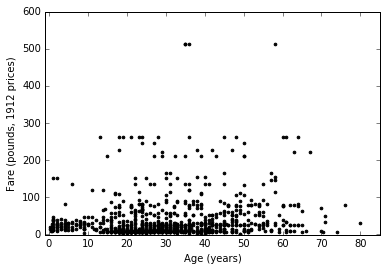

In [4]:
titanic_scatter = titanic.plot.scatter('age', 'fare', c = "black", s = 7)
plt.xlabel('Age (years)')
plt.ylabel('Fare (pounds, 1912 prices)')
titanic_scatter.set_xlim(-1, 85)
titanic_scatter.set_ylim(-1, 600)
plt.show(titanic_scatter)

For this scatter plot to visualize the relationship between ticket fare paid and age for the passengers of the Titanic I chose to use points for the mark, and position on a common scale in two dimensions for the channel. This choice of mark and channel well support the tasks of:
observing outliers in both fare and age, observing trends in the data (for example, the presence or absence of a correlation as well as the presence or absence of clusters in the data). 

There are 1309 data points in the dataset, and plotted on the scatter plot, and many of the points overlap, especially where fare is less than ~ 75 pounds and age is less than 50 years. Given this issue, the visualization I tried to deal with this by reducing the point size, but there is a lower limit to what we can visually resolve for pixel size, and there is still some overplotting of the data. One futher way I could improve the plot could be to change the luminance of the points, such that areas with more points would be darker. Again, given that we have limited abilities to perceive luminance difference, this would be helpful for this plot, but if we added even more data points where fare is less than ~ 75 pounds and age is less than 50 years we would again have an overplotting issue.


# Exercise 2 (optional) - Plotting two quantitative variables (value attributes) and one categorical variable (key attribute) as a scatterplot in Python

The scatter plot below illustrates the relationship between ticket fare paid, age and pclass for the passengers of the Titanic.


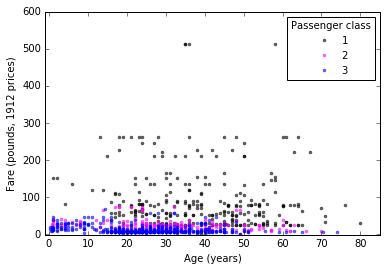

In [5]:
titanic_pcalss_fig, titanic_pcalss_ax = plt.subplots()

# choose 3 colors for points:
color = ['black', 'magenta', 'blue']

# loop over pclass groups to plot on same access
count = 0
for name, group in titanic.groupby('pclass'):
    titanic_pcalss_ax.plot(group.age, group.fare, '.', 
                           label = name, alpha = 0.6, 
                           c = color[count])
    count += 1

# set legend
titanic_pcalss_ax.legend(numpoints=1, title = "Passenger class", fontsize = 10)

# set axis labels and limits
plt.xlabel('Age (years)')
plt.ylabel('Fare (pounds, 1912 prices)')
titanic_pcalss_ax.set_xlim(-1, 85)
titanic_pcalss_ax.set_ylim(-1, 600)

plt.show(titanic_pcalss_fig)

For this scatter plot to visualize the relationship between ticket fare paid, age and pclass for the passengers of the Titanic I chose to use points for the mark, and position on a common scale in two dimensions, and color for the channels. 

This choice of the mark (points) and channel (position on a common scale in two dimensions) well support the tasks of: observing outliers in both fare and age, observing trends in the data (for example, the presence or absence of a correlation as well as the presence or absence of clusters in the data) per pclass level. The choice of color as one of the channels supports the task of observing differences in outliers and trends in the data between the different groups (here passenger classes).


Given that there are only 3 passenger class levels the choice of colour as a channel to identify the data points for the different groups is suitable in terms of scale. If we had many many more groups (> 5-10) then colour would no longer be suitable in terms of scale.

This is the same dataset as used in exercise, 1, and thus there are still 1309 data points in the dataset. Even using small points, separating points by colour and using luminance to all us to get some idea of point density many of the points still overlap quite a bit, especially where fare is less than ~ 75 pounds and age is less than 50 years. One future direction to improve this plot further could be to facet on passenger class, and thus we would have 3 scatter plots (one per passenger class) and the point density on each plot would be less, thus we would further reduce the overplotting issue.

# Exercise 3 - Plotting two quantitative variables (value attributes) as a line-chart in Python

The line plot shows the relationship between `population` and `year`. 

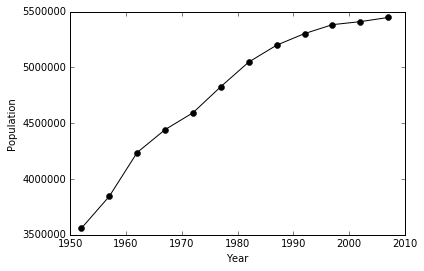

In [6]:
gap_slovac_line = gap_slovac.plot.line(x = 'year', 
                                       y = 'pop', 
                                       marker = 'o', 
                                       c = 'black', 
                                       legend=False)

# set axis labels and limits
plt.xlabel('Year')
plt.ylabel('Population')
gap_slovac_line.set_xlim(1950, 2010)

plt.show(gap_slovac_line)

For this line plot to visualize the relationship between population and year for Slovak Republic I chose to use points with line connection between them for the mark, and the vertical and horizontal spatial position the channels. 

This choice of mark and channel well support the tasks of: observing trends in the data.
The connecting lines emphasize trend, and explicitly show the relationship between one item and the next. This visual is effective because we can clearly see the trend and that the population is increasing at a near constant rate from 1950-2010. They can represent hundreds of levels, although in our case they only represent 12 levels.




# Exercise 4 - Plotting a single variable in Python as a histogram

The histogram shows the distribution of `fare`. 

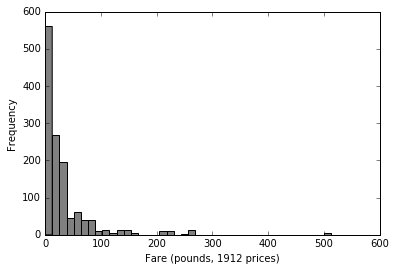

In [7]:
# histogram of fare
titanic_hist = titanic.fare.plot.hist(bins = 40, color = 'grey')
plt.xlabel('Fare (pounds, 1912 prices)')

plt.show(titanic_hist)



For this histogram to visualize the distribution of ticket fare paid for the passengers of the Titanic I chose to use lines for the mark, and both the vertical and horizontal spatial position channels for the channels. In this case the count is derived. The range of the original attribute (age) is partitioned into bins, and the number of items that fall into each bin is computed and saved as a derived ordered attribute. The keys are the bins and the values are the counts. The visual encoding of a histogram is a line mark that uses spatial position in one direction and the bins distributed along an axis in the other direction.

This choice of mark and channel well support the tasks of: finding the distribution of ticket fare paid. The line marks are all aligned within a common frame, so that the highest-accuracy aligned position channel is used. I believe that this visualisation is effective, since we can clearly see the distribution of the data. 

The scale of the histogram depends on the bin size, and not the original data. In this case I chose 40 bins because it both shows the distribution, and aligns well to the axis. 


# Exercise 5 - Plotting a single one quantitative variable (value) stratified by one categorical variable (key) in Python


The box plot shows the relationship between `fare` and `pclass`. 

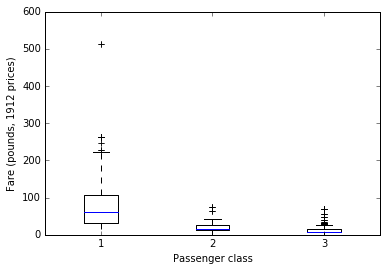

In [8]:
# side-by-side boxplot
pclass_fare_titanic = titanic[['pclass', 'fare']].pivot(columns = 'pclass', values = 'fare')

box_color = dict(boxes = 'black', 
             whiskers = 'black', 
             medians = 'blue', 
             caps = 'black')

titanic_pclass_boxplot = pclass_fare_titanic.plot.box(color = box_color)
plt.xlabel('Passenger class')
plt.ylabel('Fare (pounds, 1912 prices)')

plt.show(titanic_pclass_boxplot)




For this side-by-side boxplot to visualize the distribution of ticket fare paid for each passenger class of the Titanic I chose to use one glyph per passenger class for the mark, and  the vertical spatial position, and alignment of glyphs into separated with horizontal spatial position for the channels. Boxplots use five derived variables that provide information about the attribute's distribution: the median, the lower and upper quartiles, and the lower and upper fences (whiskers). Values that fall beyond the fences are outliers. The boxplot above shows the visual encoding of these five numbers using a glyth that relies on vertical spatial position channel. 


This choice of mark and channel well support the tasks of: finding the distribution and outliers of ticket fare paid for each passenger class. 
We can clearly see that passenger class 1 has higher average ticker fare than the other two classes and there are several outliers in each passenger class.
The scalability of the boxplots is constant; it does not depend on the size of original table. There are three passenger classes. If the number of categories is more than a dozen, a side-by-side boxplot might not be appropriate.






# Exercise 6 - Plotting two categorical variables (keys) in Python


The stacked bar-chart shows the relationship between `pclass` and `survived`. 

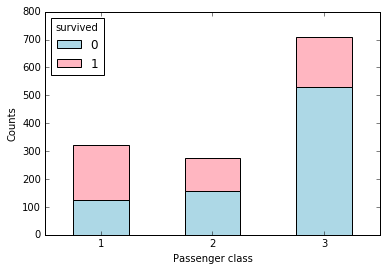

In [9]:
# bar plot
contingency_titanic = titanic.groupby(['pclass', 'survived']).size().unstack()
titanic_barplot = contingency_titanic.plot.bar(stacked=True, 
                                               color = ["lightblue", "lightpink"])
plt.ylabel("Counts")
plt.xlabel('Passenger class')
plt.xticks(rotation=0)
plt.show(titanic_barplot)


For this stacked bar-chart to visualize the relationship between passenger class and number of survivors/death for the passengers of the Titanic I chose to use vertical stack of line for the mark, and vertical position of the glyph, and one spatial regions per glyph, and color for the channel. 


This choice of mark and channel well support the tasks of:
showing the distribution of passenger class and number of survivors. The line marks are all aligned within a common frame, so that the highest-accuracy aligned position channel is used. 
Stacked bar charts can show part to whole relationships and trends, and are useful to lookup values. We can see that passenger class 3 has the largest count and passenger class 1 has the largest survival proportion. 

As for scalability, it works well with several to one dozen levels for stacked attribute.



